In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


# Importar datos
Se importan los datos a un dataframe de Pandas y se visualiza su estructura

In [2]:
data = pd.read_csv('beer_reviews.csv')
data.head()

,id_cerveceria,nombre_cerveceria,fecha_calificacion,calificacion_total,calificacion_aroma,calificacion_apariencia,usuario,tipo_cerveza,calificacion_paleta,calificacion_sabor,nombre_cerveza,grado_alcohol,id_cerveza
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


# 1. Mayor grado de alcohol

Aquí se agrupan las categorias, dependiendo de la cervecería:

In [3]:
grouped_bre = data.groupby('nombre_cerveceria')
grouped_bre.head()

,id_cerveceria,nombre_cerveceria,fecha_calificacion,calificacion_total,calificacion_aroma,calificacion_apariencia,usuario,tipo_cerveza,calificacion_paleta,calificacion_sabor,nombre_cerveza,grado_alcohol,id_cerveza
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
10,163,Amstel Brouwerij B. V.,1010963392,3.0,2.0,3.0,fodeeoz,Light Lager,2.5,2.5,Amstel Light,3.5,436


Ahora se procede a tomar los promedios del volumen de alcohol

In [4]:
grouped_bre['grado_alcohol'].mean()

nombre_cerveceria
't Hofbrouwerijke                    6.789189
(512) Brewing Company                7.149662
10 Barrel Brewing Co.                6.066667
1516 Brewing Company                 6.266667
16 Mile Brewing Company              6.033696
1648 Brewing Company Ltd             3.700000
1702 / The Address Brewing Co.       6.800000
192 Brewing Company                  6.000000
1st City Brewery and Grill                NaN
2 Brothers Brewery                   6.172549
21st Amendment Brewery               7.057133
23rd Street Brewery                  6.466500
2nd Shift Brewery                    6.883333
3 Cordilleras                             NaN
3 Ravens Brewing                     5.380672
3 Stars Brewing Company              7.000000
32 Via Dei Birrai                    6.776923
4 Hands Brewing Co.                  6.000000
4 Pines Brewing Company              5.178182
4Seasons Sports Bar & Brew Pub       5.000000
4th Street Brewing Co.               6.466667
4th Street Brewi

Aquí se nota que hay valores faltantes en las filas, por lo cual se procede  por el momento a eliminar filas con valor NaN, para que no afecten el promedio.

In [5]:
data = data.dropna()
grouped_bre = data.groupby('nombre_cerveceria')
means_bre = grouped_bre['grado_alcohol'].mean()
means_bre

nombre_cerveceria
't Hofbrouwerijke                    6.789189
(512) Brewing Company                7.149662
10 Barrel Brewing Co.                6.066667
1516 Brewing Company                 6.266667
16 Mile Brewing Company              6.033696
1648 Brewing Company Ltd             3.700000
1702 / The Address Brewing Co.       6.800000
192 Brewing Company                  6.000000
2 Brothers Brewery                   6.172549
21st Amendment Brewery               7.057133
23rd Street Brewery                  6.466500
2nd Shift Brewery                    6.883333
3 Ravens Brewing                     5.381197
3 Stars Brewing Company              7.000000
32 Via Dei Birrai                    6.776923
4 Hands Brewing Co.                  6.000000
4 Pines Brewing Company              5.178182
4Seasons Sports Bar & Brew Pub       5.000000
4th Street Brewing Co.               6.466667
5 Rabbit Cerveceria                  5.503846
50 Back Brewing Company              4.900000
508 Gastrobrewer

Ahora se seleccionan las 5 cervecerías con el grado de alcohol más alto en promedio y se hace una prueba de hipótesis para saber si hay alguna diferencia significativa entre el promedio más alto y las demás.

In [6]:
from scipy import stats
maxes_bre = means_bre.sort_values(ascending=False)

In [7]:
maxes_bre[0:5]

nombre_cerveceria
Schorschbräu                19.228824
Shoes Brewery               15.200000
Rome Brewing Company        13.840000
Hurlimann Brewery           13.750000
Alt-Oberurseler Brauhaus    13.200000
Name: grado_alcohol, dtype: float64

In [8]:
schor_a = data[data.nombre_cerveceria == 'Schorschbräu'].grado_alcohol
shoes_a = data[data.nombre_cerveceria == 'Shoes Brewery'].grado_alcohol
rome_a = data[data.nombre_cerveceria == 'Rome Brewing Company'].grado_alcohol
hurli_a = data[data.nombre_cerveceria == 'Hurlimann Brewery'].grado_alcohol
alt_a = data[data.nombre_cerveceria == 'Alt-Oberurseler Brauhaus'].grado_alcohol

In [9]:
stats.ttest_ind(schor_a, shoes_a)

Ttest_indResult(statistic=0.45592753989309015, pvalue=0.65134092441707714)

En este caso se tiene que no se puede rechazar la hipótesis de que las dos primeras cervcerías tienen cervezas con el mismo nivel de alcohol. por lo que se procede a comparar con la tercera cervecería.

In [10]:
stats.ttest_ind(schor_a, rome_a)

Ttest_indResult(statistic=0.96491601168884489, pvalue=0.34085156999662358)

Tampoco es posible establecer una diferencia significativa con la tercera cervecería, por lo que se sigue a la cuarta.

In [11]:
stats.ttest_ind(schor_a, hurli_a)

Ttest_indResult(statistic=1.8757624400448392, pvalue=0.066532253982775055)

Todavía no es posible establecer una diferencia significativa con un nivel de significancia lo suficientemente alto, 95% o más, por lo que se compara con la quinta cervecería.

In [12]:
stats.ttest_ind(schor_a, alt_a)

/home/juan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/juan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [13]:
alt_a

652412    13.2
Name: grado_alcohol, dtype: float64

En este caso no se tienen suficientes grados de libertad, por lo cual se procede a probar si es probable que la media esté cerca al valor de la última cervecería.

In [14]:
stats.ttest_1samp(schor_a, 13.2)

Ttest_1sampResult(statistic=2.8517005346679598, pvalue=0.0074460655989043688)

Se concluye que con 95% de confianza, el grado de alcohol de la cervecería Schorsbräu es mayor que el de la Alt-Oberurseler Brauhaus. Además con un 95% de confianza no es posible establecer si hay una diferencia significativa entre el contenido de alcohol de las primeras 4 cervecerías.

Ahora, lo más sencillo al recomendar una cerveza sería elegirla de acuerdo a la calificación del usuario.
Para esto, se agrupan las calificaciones por el nombre de la cerveza.

Esto se puede ver más fácil por medio de un boxplot como:

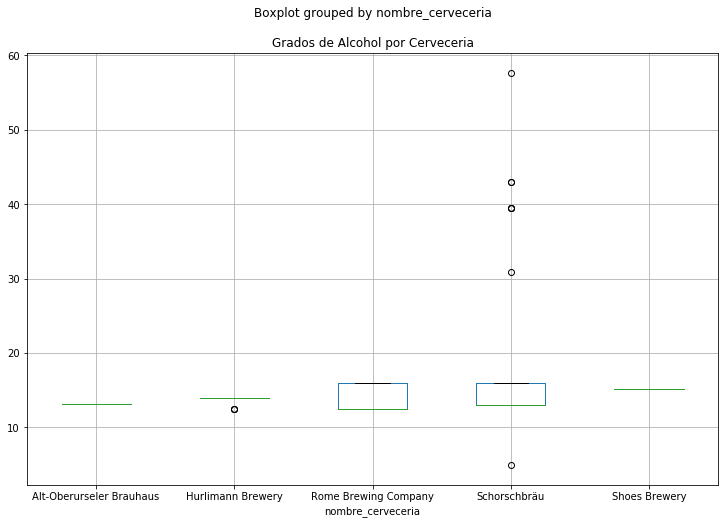

In [154]:
interest = data.loc[np.logical_or(np.logical_or(np.logical_or(np.logical_or(data.nombre_cerveceria == 'Schorschbräu', data.nombre_cerveceria == 'Shoes Brewery'), data.nombre_cerveceria == 'Rome Brewing Company'), data.nombre_cerveceria == 'Hurlimann Brewery'), data.nombre_cerveceria == 'Alt-Oberurseler Brauhaus')]
interest.boxplot('grado_alcohol', by='nombre_cerveceria', figsize=(12,8))
plt.title('Grados de Alcohol por Cerveceria')

Donde se logra ver porque es dificil determinar estadísticamente la diferencia entre grados de alcohol entre cervecerías, si bien la Schorsbräu tiene varias cervezas con mayor grado alcoholico que el resto.

# 2. Mejores 3 cervezas

In [15]:
grouped_beer = data.groupby('nombre_cerveza')
grouped_beer.head()

,id_cerveceria,nombre_cerveceria,fecha_calificacion,calificacion_total,calificacion_aroma,calificacion_apariencia,usuario,tipo_cerveza,calificacion_paleta,calificacion_sabor,nombre_cerveza,grado_alcohol,id_cerveza
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


De forma similar, se procede a tomar promedios y organizarlos de mayor a menor.

In [16]:
means_beer = grouped_beer.calificacion_total.mean()
maxes_beer = means_beer.sort_values(ascending=False)
maxes_beer

nombre_cerveza
Kringle's Imperial Stout                         5.0
Dry-Hopped New World Porter                      5.0
Sunderland Brown Ale                             5.0
Double Bubble DIPA With Bubblegum                5.0
Double Dry Hopped Palomino Pale Ale              5.0
Suke Quto Coffee IPA                             5.0
Suicide By Hops                                  5.0
AAA                                              5.0
Sub-Zero                                         5.0
Sub Zero Lager                                   5.0
Drake's Pinot Noir Barrel Aged Imperial Stout    5.0
Stubbies Swamp Stout                             5.0
Strongman Belgian Strong Dark                    5.0
Dry Hopped Abominable Ale                        5.0
String Of Ponies                                 5.0
Stratus Pale Ale                                 5.0
Facer's North Star Porter                        5.0
East India Dry Stout                             5.0
Stone Old Guardian Barley Wine 

Aquí se ve que hay muchas cervezas tienen una calificación de 5, pero si se mira detenidamente, estas cervezas solo tienen una calificación, por lo cual no son datos muy confiables. Se añade, entonces una columna que nos diga cuantos elementos hay en el grupo.

In [17]:
beer_counts = grouped_beer.size().reset_index(name='counts')
beer_counts.head()

,nombre_cerveza,counts
0,! (Old Ale),1
1,"""100""",5
2,"""100"" Pale Ale",1
3,"""12"" Belgian Golden Strong Ale",2
4,"""33"" Export",3


In [18]:
invalid = beer_counts.loc[beer_counts.counts == 1].nombre_cerveza.as_matrix()
invalid

array(['! (Old Ale)', '"100" Pale Ale', '"50" Golden Anniversary Lager',
       ..., '“Chewy” Double IPA', '横須賀ビアサケ (Yokosuka Biasake)',
       '葉山ビール (Hayama Beer)'], dtype=object)

In [19]:
indices = np.zeros(invalid.shape)
for i in range(invalid.shape[0]):
    indices[i] = np.array(grouped_beer.get_group(invalid[i]).index)[0]
temp = data.drop(indices)
temp.head()

,id_cerveceria,nombre_cerveceria,fecha_calificacion,calificacion_total,calificacion_aroma,calificacion_apariencia,usuario,tipo_cerveza,calificacion_paleta,calificacion_sabor,nombre_cerveza,grado_alcohol,id_cerveza
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [20]:
grouped_beer = temp.groupby('nombre_cerveza')
means_beer = grouped_beer.calificacion_total.mean()
maxes_beer = means_beer.sort_values(ascending=False)
maxes_beer[:50]

nombre_cerveza
La Sambresse Blonde                                 5.000000
Abijah Rowe                                         5.000000
Bennie's Brew                                       5.000000
Pilsner 005                                         5.000000
Nebula Nut Brown Ale                                5.000000
Bolita Brown - East India Trader                    5.000000
Lips Of Faith - Eric's Ale (Bourbon Barrel Aged)    5.000000
Divine Vamp 3                                       5.000000
BruRM Bobbiedangler Strong Ale                      5.000000
Hop It                                              5.000000
Sunderland Mild                                     5.000000
Golding Bitter                                      5.000000
In-Toxicated Cherry Ale                             5.000000
Love Child Belgiweizen                              5.000000
Midlands Mild "A Spoonful Weighs A Ton"             5.000000
Old Chub - Coconut                                  5.000000
Lambik (2

Ahora se mira cuantos usuarios calificaron cada una de las cervezas para las 50 mejores cervezas, esperando tener como criterio que un número importante de usuarios haya calificado las cervezas para poder considerarlas como candidatas a las mejores.

In [21]:
best_beers = np.array(maxes_beer[:50].axes).flatten()

In [22]:
best_counts = beer_counts[beer_counts.nombre_cerveza.isin(best_beers)]

In [23]:
best_counts

,nombre_cerveza,counts
918,Abijah Rowe,2
1342,Alesmith Speedway Stout - Vanilla And Coconut,8
3498,Barrel Aged Spank Me Baby,4
4351,Bennie's Brew,2
5124,Black Cat Coffee Stout,3
6218,Bolita Brown - East India Trader,2
6616,Bourbon Cask Porter,2
7414,BruRM Bobbiedangler Strong Ale,2
7540,Bubba Imperial Pilsner,2
7938,C. Brown's Pumpkin Ale,2


Aquí se logra ver que la mayoría de cervezas tiene muy pocas reseñas, por lo que en esta lista en la que los puntajes eran muy similares se escogen las cervezas con más reseñas.

Una regla que se podría usar para escoger adecuadamente el balance entre puntuación y reseñas debería tender a la calificación original con el número de reseñas y penalizar fuertemente la falta de reseñas. Una alternativa es:

$$ score = puntaje*(1-e^{-a*reviews}) $$

In [42]:
scores = np.array(maxes_beer[:50])*(1.-np.exp(-2*best_counts.counts))
scores.sort_values(ascending=False)

1342     4.999999
13126    4.999996
9926     4.999996
19758    4.999969
3498     4.998323
23077    4.998323
20256    4.998323
5124     4.987606
22970    4.987606
18736    4.987606
16716    4.987606
15379    4.987606
12203    4.987606
21609    4.908422
18862    4.908422
16110    4.908422
10975    4.908422
11763    4.908422
8335     4.908422
7938     4.908422
7540     4.908422
7414     4.908422
6616     4.908422
6218     4.908422
4351     4.908422
20037    4.908422
918      4.908422
22861    4.908422
27898    4.862916
28561    4.856922
23652    4.847067
30423    4.845103
41305    4.833333
39251    4.833329
43638    4.833114
42737    4.831712
23713    4.826615
30484    4.821353
34246    4.821353
35092    4.821353
37495    4.821353
38480    4.821353
25593    4.810253
24092    4.810253
27183    4.785711
26986    4.785711
28382    4.768181
30449    4.757393
37855    4.744808
38144    4.744808
Name: counts, dtype: float64

Que en este caso resulta en escoger cervezas de puntaje 5.0 con la mayor cantidad posible de reseñas, siendo las tres recomendadas:

Alesmith Speedway Stout - Vanilla And Coconut con 8 calificaciones

El Gordo con 7 calificaciones

Coffee Infused Imperial Stout Trooper con 7 calificaciones

# 3. Parámetros más importantes

La forma más fácil de medir la importancia de los parámetros es por medio de un test F, para el cual se determina la dependencia entre variables y el porcentaje de la varianza que explican. Se hace entonces:

In [25]:
X = data[['calificacion_aroma', 'calificacion_sabor', 'calificacion_apariencia', 'calificacion_paleta']]
y = data['calificacion_total']

SelectKBest filtra las variables por la que tenga el mejor p-value de acuerdo al estadístico F (por default), conservando k variables.

In [26]:
from sklearn. feature_selection import SelectKBest
best_feat = SelectKBest(k=1)
best = best_feat.fit_transform(X,y)

In [27]:
best[:5]

array([[ 1.5],
       [ 3. ],
       [ 3. ],
       [ 3. ],
       [ 4.5]])

In [28]:
X.head()

,calificacion_aroma,calificacion_sabor,calificacion_apariencia,calificacion_paleta
0,2.0,1.5,2.5,1.5
1,2.5,3.0,3.0,3.0
2,2.5,3.0,3.0,3.0
3,3.0,3.0,3.5,2.5
4,4.5,4.5,4.0,4.0


En este caso se logra ver que el parámetro más importante es el sabor, dado que tiene el p-value más bajo de avuerdo al estadístico F.

# Cervezas de acuerdo a aroma y apariencia

Aquí se puede agrupar las cervezas de acuerdo a su tipo para análisis. y se puede tomar promedios como primera aproximación

In [29]:
grouped_tip = data.groupby('tipo_cerveza')
means_cat = grouped_tip[['calificacion_aroma', 'calificacion_apariencia']].mean()

Ahora se organizan por cada uno de los parámetros para ver si hay alguna relación simple.

In [30]:
best_aro = means_cat.sort_values('calificacion_aroma', ascending=False)
best_apa = means_cat.sort_values('calificacion_apariencia', ascending=False)

In [31]:
best_aro.head()

,calificacion_aroma,calificacion_apariencia
tipo_cerveza,,
American Double / Imperial Stout,4.161521,4.164253
Eisbock,4.157348,3.962977
American Wild Ale,4.134697,4.011311
Quadrupel (Quad),4.133521,4.119893
Lambic - Unblended,4.126564,3.918191


In [32]:
best_apa.head()

,calificacion_aroma,calificacion_apariencia
tipo_cerveza,,
Russian Imperial Stout,4.077746,4.212713
American Double / Imperial Stout,4.161521,4.164253
Quadrupel (Quad),4.133521,4.119893
American Black Ale,3.934274,4.116263
Belgian IPA,3.984353,4.081093


En este caso se tiene que la American Double Stout y la Quadrupel (Quad) se califican muy bien en los dos parámetros, por los cual se debe tomar la decisión entre las dos. Si este no fuera el caso se debería producir un puntaje combinado (promedio o promedio ponderado por importancia) y escoger la mejor como se hizo en el punto 1, por promedios y test estadísticos.

Ahora se evalúa si hay una diferencia estadísticamente significativa entre las dos para los dos parámetros.

In [33]:
american = data[data.tipo_cerveza == 'American Double / Imperial Stout'][['calificacion_aroma', 'calificacion_apariencia']]
quad = data[data.tipo_cerveza == 'Quadrupel (Quad)'][['calificacion_aroma', 'calificacion_apariencia']]

Con respecto al aroma:

In [34]:
stats.ttest_ind(american.calificacion_aroma, quad.calificacion_aroma)

Ttest_indResult(statistic=5.7125292265909984, pvalue=1.1177176493071169e-08)

Se tiene que hay una diferencia estadísticamente significativa con respecto al parámetro de aroma.

Con respecto a la apariencia:

In [35]:
stats.ttest_ind(american.calificacion_apariencia, quad.calificacion_apariencia)

Ttest_indResult(statistic=9.8957060338208152, pvalue=4.5041536818269967e-23)

Se tiene que hay una diferencia estadísticamente siginificativa con respecto a la apariencia.

Con un 99% de confianza, puedo decir que la mejor cerveza en los dos parḿetros es la American Double / Imperial Stout.

# 5. Función de recomendaciones

Lo primero es hallar las características "Reales" de cada cerveza, lo cual se asume es simplemente el promedio de sus calificaciones, dado el número total de reviews que se tienen.

In [58]:
real_des = temp.groupby('nombre_cerveza')[['calificacion_aroma', 'calificacion_sabor', 'calificacion_apariencia', 'calificacion_paleta']].mean()
real_des.head()

,calificacion_aroma,calificacion_sabor,calificacion_apariencia,calificacion_paleta
nombre_cerveza,,,,
"""100""",4.000000,4.400000,4.000000,4.000000
"""12"" Belgian Golden Strong Ale",3.500000,4.500000,4.250000,4.750000
"""33"" Export",3.000000,3.000000,3.000000,3.166667
"""76"" Anniversary Ale",4.166667,4.166667,3.666667,4.000000
"""Alt""ered State",3.750000,4.000000,4.000000,4.000000


Una función debería recibir la importancia que se quiere dar a cada parámetro, para hacer un producto como:

In [59]:
importance = np.ones(4)
(np.dot(real_des.as_matrix(),importance))

array([ 16.4       ,  17.        ,  12.16666667, ...,  12.16666667,
        17.25      ,  15.        ])

De manera similar se debería se debería tener en cuenta el número de reviews a la hora de escoger una cerveza, como se hizo anteriormente, usando un score. por lo que se define la función de recompendaciones como:

In [56]:
real_des['total'] = pd.Series((np.dot(real_des.as_matrix(),importance)), index=real_des.index)

In [57]:
real_des.head()

,calificacion_aroma,calificacion_sabor,calificacion_paleta,calificacion_paleta,total
nombre_cerveza,,,,,
"""100""",4.000000,4.400000,4.000000,4.000000,16.400000
"""12"" Belgian Golden Strong Ale",3.500000,4.500000,4.750000,4.750000,17.500000
"""33"" Export",3.000000,3.000000,3.166667,3.166667,12.333333
"""76"" Anniversary Ale",4.166667,4.166667,4.000000,4.000000,16.333333
"""Alt""ered State",3.750000,4.000000,4.000000,4.000000,15.750000


In [144]:
def recommended(aroma=1., sabor=1., apariencia=1., paleta=1.):
    importance = np.array([aroma, sabor, apariencia, paleta])
    data=pd.read_csv('beer_reviews.csv')
    
    #Agrupado por cerveza
    grouped_beer=data.groupby('nombre_cerveza')[['calificacion_aroma', 'calificacion_sabor', 'calificacion_apariencia', 'calificacion_paleta']]
    
    #Conteos de reviews por cerveza
    beer_counts = grouped_beer.size().reset_index(name='counts')
    beer_counts.head()
    
    #Filtro para asegurar mas de un review por cerveza
    invalid = beer_counts.loc[beer_counts.counts == 1].nombre_cerveza.as_matrix()
    indices = np.zeros(invalid.shape)
    for i in range(invalid.shape[0]):
        indices[i] = np.array(grouped_beer.get_group(invalid[i]).index)[0]
    temp = data.drop(indices)
    
    #Nueva agrupacion por cerveza
    grouped_beer = temp.groupby('nombre_cerveza')[['calificacion_aroma', 'calificacion_sabor', 'calificacion_apariencia', 'calificacion_paleta']]
    beer_counts = grouped_beer.size().reset_index(name='counts')
    
    #Descripcion "real" de las cervezas
    real_des = grouped_beer.mean()
    
    #Calificacion total por importancia
    #total = np.dot(real_des.as_matrix(),importance)
    real_des['total'] = pd.Series((np.dot(real_des.as_matrix(),importance)), index=real_des.index)
    
    # Score por cantidad de reviews
    real_des['scores'] = pd.Series(real_des.total.as_matrix()*(1.-np.exp(-2*beer_counts.counts.as_matrix())), index=real_des.index)
    scores.sort_values(ascending=False)
    
    return real_des.scores[0:1]

In [145]:
a = recommended()

In [146]:
a

nombre_cerveza
"100"    16.399255
Name: scores, dtype: float64